In [1]:
from ultralytics import YOLO
import os
import sys
import time
from PIL import Image
import torchvision
import json
import numpy as np
import zipfile
import cv2
import matplotlib.pyplot as plt

In [2]:
model = YOLO("runs/detect/test_8n2/weights/best.pt").cuda()  # load a pretrained model (recommended for training)
# # Use the model

# transform = torchvision.transforms.Compose([
#     torchvision.transforms.CenterCrop((640,640)),
#     torchvision.transforms.Resize((640,640)),
#     torchvision.transforms.ToTensor(),
#     # torchvision.transforms.Normalize((0.5,0.5,0.5),(0.5,0.5,0.5))
# ])

In [3]:
test_path = 'datasets/test'

for fname in os.listdir(test_path):
    img_path = os.path.join(test_path,fname)
    img_path = 'datasets/test/2155.png'
    
    # img = Image.open(img_path)
    # img = transform(img)
    # img = img.to('cuda').unsqueeze(0)
    
    result = model(img_path)[0]
    
    boxes = result.boxes

    pred = []
    for i in range(len(boxes.cls)):
        x_center,y_center,w,h = boxes.xywh[i].detach().cpu()
        
        x = x_center - w/2
        y = y_center - h/2
        
        box = np.array([x, y, w, h], dtype=np.int64).tolist()
        
        result_dict= {
            'image_id' : int(fname.replace('.png','')),
            'category_id' : int(boxes.cls[i]),
            'bbox' : box,
            'score' : float(boxes.conf[i])
        }
        pred.append(result_dict)
    break
print(len(pred))


image 1/1 /workspace/24CV/final/datasets/test/2155.png: 352x640 1 1, 1 2, 1 8, 2 10s, 2 11s, 1 13, 68.3ms
Speed: 2.0ms preprocess, 68.3ms inference, 285.1ms postprocess per image at shape (1, 3, 352, 640)
8


In [4]:
import random
print(random.choice(range(255)))
color = [[random.choice(range(255))for _ in range(3)] for _ in range(15)] 
print(color)
print(color[1][1])


138
[[60, 190, 109], [230, 135, 95], [117, 101, 95], [65, 216, 178], [36, 229, 37], [95, 229, 77], [173, 222, 74], [148, 14, 154], [59, 115, 16], [157, 36, 222], [213, 71, 220], [57, 74, 108], [167, 60, 158], [188, 217, 83], [166, 169, 107]]
135


In [5]:
print(boxes)

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([13., 11.,  8.,  1.,  2., 10., 10., 11.], device='cuda:0')
conf: tensor([0.9630, 0.9625, 0.9547, 0.9397, 0.9217, 0.5310, 0.3808, 0.3616], device='cuda:0')
data: tensor([[1.8739e+02, 1.0111e+02, 2.7288e+02, 3.4316e+02, 9.6296e-01, 1.3000e+01],
        [9.8779e+01, 6.9386e+01, 1.9243e+02, 3.4175e+02, 9.6250e-01, 1.1000e+01],
        [5.4473e+00, 9.2299e+01, 8.9269e+01, 3.4326e+02, 9.5469e-01, 8.0000e+00],
        [2.8357e+02, 8.2001e+01, 3.3291e+02, 2.4106e+02, 9.3969e-01, 1.0000e+00],
        [3.0009e+02, 2.0529e+01, 3.4045e+02, 1.1036e+02, 9.2166e-01, 2.0000e+00],
        [3.6060e+02, 3.1879e+01, 3.9199e+02, 1.0061e+02, 5.3100e-01, 1.0000e+01],
        [3.4989e+02, 1.0831e+02, 3.7836e+02, 1.4913e+02, 3.8084e-01, 1.0000e+01],
        [3.6017e+02, 3.1375e+01, 3.9207e+02, 1.0003e+02, 3.6164e-01, 1.1000e+01]], device='cuda:0')
id: None
is_track: False
orig_shape: (345, 640)
shape: torch.Size([8, 6])
xywh: tensor([[230.13

W, H : (640, 345)
(345, 640, 3)
187 101 272 343
98 69 191 341
5 92 88 342
283 82 332 241
300 20 340 109
360 31 391 99
349 108 377 148
360 31 391 99


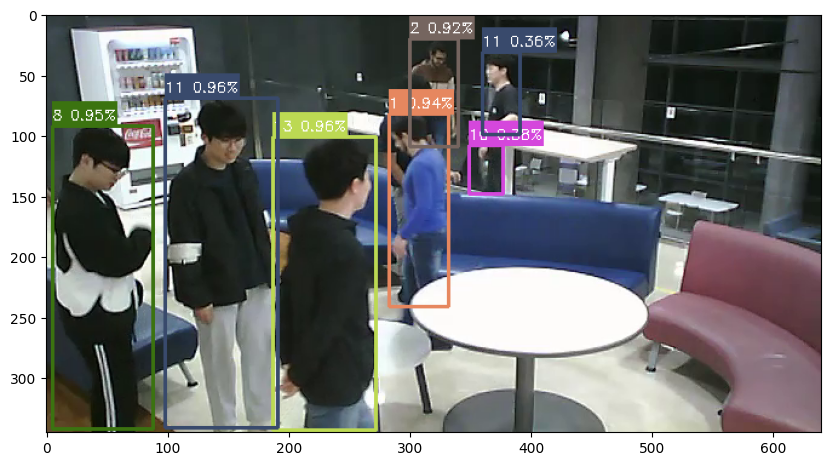

In [7]:

# 이미지 로드
image = Image.open(img_path)
W, H = image.size
print(f"W, H : {W, H}")

image = np.array(image)
print(image.shape)
for i, p in enumerate(pred):
    box = p['bbox']
    id = p['category_id']
    prob = p['score']
    x, y , w, h = box
    x = int(x)
    y = int(y)
    x_end = int(x+w)
    y_end = int(y+h)
    
    # x, y, x_end, y_end = box
    
    # x, y , x_end, y_end = np.array(boxes.xyxy[i].detach().cpu().numpy(), dtype=np.int64)
    print(x,y,x_end,y_end)
    cv2.rectangle(image, (x, y), (x_end, y_end), color[id], 2)  # (0, 255, 0)은 색상, 2는 선의 두께
    # Finds space required by the text so that we can put a background with that amount of width.
    (w, h), _ = cv2.getTextSize(
            f"{id} {prob:.2f}%", cv2.FONT_HERSHEY_SIMPLEX, 0.4, 1)

    # Prints the text.    
    image = cv2.rectangle(image, (x, y - 20), (x + w, y), color[id], -1)
    image = cv2.putText(image, f"{id} {prob:.2f}%", (x, y - 5),
                        cv2.FONT_HERSHEY_SIMPLEX, 0.4, (255,255,255), 1)

    # # For printing text
    # img = cv2.putText(img, 'test', (x1, y1),
    #                     cv2.FONT_HERSHEY_SIMPLEX, 0.6, (255,255,255), 1)

# 이미지 보여주기
plt.figure(figsize=(10,10))
plt.imshow(image)